# Trying out keras and tensorflow

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import glob

print(tf.__version__)

2.0.0


## Loading dataset

### Training dataset

In [2]:
dirImage = 'chest_xray_pneumonia/selected_dataset/'

filenames_train = []
filenames_train += glob.glob(dirImage+"training/*.jpg")

train_images = []
for file in filenames_train:
    img = np.asarray(cv.imread(file, 0))
    train_images.append(img)

train_images = np.asarray(train_images)

train_labels = []
with open(dirImage+'training/training_labels.txt', 'r') as rd:
    for line in rd:
        train_labels.append(int(line))
train_labels = np.asarray(train_labels, dtype=np.uint8)
print('Training images: ', train_images.shape)
print('Training labels: ', len(train_labels))

Training images:  (3747, 688, 1024)
Training labels:  3747


Image: 


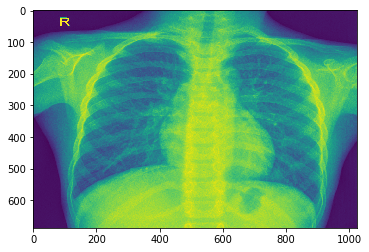

Label: 
1


In [3]:
i = np.random.randint(0, len(train_images))

print('Image: ')
plt.imshow(train_images[i])
plt.show()

print('Label: ')
print(train_labels[i])

In [4]:
dirImage = 'chest_xray_pneumonia/selected_dataset/'

filenames_val = []
filenames_val += glob.glob(dirImage+"validation/*.jpg")

val_images = []
for file in filenames_val:
    img = np.asarray(cv.imread(file, 0))
    val_images.append(img)

val_images = np.asarray(val_images)

val_labels = []
with open(dirImage+'validation/validation_labels.txt', 'r') as rd:
    for line in rd:
        val_labels.append(int(line))
val_labels = np.asarray(val_labels, dtype=np.uint8)
print('Validation images: ', val_images.shape)
print('Validation labels: ', len(val_labels))

Validation images:  (13, 688, 1024)
Validation labels:  13


Image: 


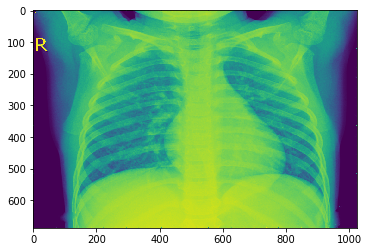

Label: 
1


In [5]:
i = np.random.randint(0, len(val_images))

print('Image: ')
plt.imshow(val_images[i])
plt.show()

print('Label: ')
print(val_labels[i])

In [6]:
dirImage = 'chest_xray_pneumonia/selected_dataset/'

filenames_test = []
filenames_test += glob.glob(dirImage+"testing/*.jpg")

test_images = []
for file in filenames_test:
    img = np.asarray(cv.imread(file, 0))
    test_images.append(img)

test_images = np.asarray(test_images)

test_labels = []
with open(dirImage+'testing/testing_labels.txt', 'r') as rd:
    for line in rd:
        test_labels.append(int(line))
test_labels = np.asarray(test_labels, dtype=np.uint8)
print('Testing images: ', test_images.shape)
print('Testing labels: ', len(test_labels))

Testing images:  (444, 688, 1024)
Testing labels:  444


Image: 


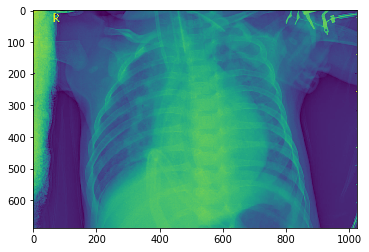

Label: 
1


In [7]:
i = np.random.randint(0, len(test_images))

print('Image: ')
plt.imshow(test_images[i])
plt.show()

print('Label: ')
print(test_labels[i])

## Scaling images

In [8]:
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

## Setting up model

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(688, 1024)),
    keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=5)

Train on 3747 samples
Epoch 1/5
3747/3747 [==============================] - 233s 62ms/sample - loss: 38.0924 - accuracy: 0.5420
Epoch 2/5
3747/3747 [==============================] - 219s 58ms/sample - loss: 1.8832 - accuracy: 0.6117
Epoch 3/5
3747/3747 [==============================] - 217s 58ms/sample - loss: 0.9335 - accuracy: 0.5733
Epoch 4/5
3747/3747 [==============================] - 214s 57ms/sample - loss: 0.7659 - accuracy: 0.5706
Epoch 5/5
3747/3747 [==============================] - 226s 60ms/sample - loss: 0.7300 - accuracy: 0.5866


In [15]:
model.evaluate(val_images, val_labels, verbose=2)

13/1 - 1s - loss: 1.3712 - accuracy: 0.3846


[1.3711743354797363, 0.3846154]

In [16]:
model.evaluate(test_images, test_labels, verbose=2)

444/1 - 15s - loss: 0.6462 - accuracy: 0.4842


[1.1443164792952236, 0.48423424]